### Description of dataset
* Dataset's name: [Daily Historical Stock Prices (1970 - 2018)](https://www.kaggle.com/ehallmar/daily-historical-stock-prices-1970-2018)
* Description: Historical stock prices for several thousand unique stock tickers

### Import findspark to read SPARK_HOME and HADOOP_HOME

In [1]:
# Import findspark to read SPARK_HOME and HADOOP_HOME
import findspark
import matplotlib.pyplot as plt
findspark.init()

In [2]:
# Import required library
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

In [3]:
# Print Spark object ID
print(spark)

### Loading Data using Spark

In [4]:
df = spark.read.csv("D://Documents//Semester_8//Apache-Spark//historical_stock_prices.csv", header=True)

In [5]:
df.show()

+------+----------------+----------------+----------------+----------------+----------------+-------+----------+
|ticker|            open|           close|       adj_close|             low|            high| volume|      date|
+------+----------------+----------------+----------------+----------------+----------------+-------+----------+
|   AHH|            11.5|11.5799999237061|8.49315452575684|           11.25|11.6800003051758|4633900|2013-05-08|
|   AHH|11.6599998474121|11.5500001907349|8.47115135192871|            11.5|11.6599998474121| 275800|2013-05-09|
|   AHH|11.5500001907349|11.6000003814697|8.50782203674316|            11.5|11.6000003814697| 277100|2013-05-10|
|   AHH|11.6300001144409|11.6499996185303|8.54449367523193|11.5500001907349|11.6499996185303| 147400|2013-05-13|
|   AHH|11.6000003814697|11.5299997329712|8.45648384094238|            11.5|11.6000003814697| 184100|2013-05-14|
|   AHH|11.6000003814697|11.6000003814697|8.50782203674316| 11.539999961853|11.6000003814697|  7

In [6]:
df.count()

20973889

In [7]:
df.printSchema()

root
 |-- ticker: string (nullable = true)
 |-- open: string (nullable = true)
 |-- close: string (nullable = true)
 |-- adj_close: string (nullable = true)
 |-- low: string (nullable = true)
 |-- high: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- date: string (nullable = true)



In [8]:
df.createOrReplaceTempView("stock")

In [9]:
result = spark.sql("SELECT DISTINCT ticker FROM stock")

In [10]:
result.show()

+------+
|ticker|
+------+
|   MHF|
|   TNP|
|  BAND|
|   PKE|
|  CARS|
|  CBIO|
|  HBNC|
|  ALXN|
|   CRS|
|   EFR|
|   GIS|
|  IDLB|
|   FMY|
|   IHD|
|   TYG|
|   TLI|
|   CCK|
|     K|
|   BOX|
|  MNGA|
+------+
only showing top 20 rows



In [11]:
result.count()

5685

### Data Mining Process

In [12]:
### Calculate total transactions for each ticker
query1=spark.sql("select `ticker`, COUNT(`date`) as `total` \
                from stock \
                group by `ticker` \
                order by `total` ASC")

In [13]:
query1.show()

+------+-----+
|ticker|total|
+------+-----+
| CRUSC|    1|
|   CBX|    2|
| HFGIC|    4|
| MOGLC|    5|
|  PXUS|    6|
| KELYB|    9|
|  FTEO|   10|
| LEXEB|   11|
| OKDCC|   11|
| FOANC|   13|
|   EAI|   13|
| ROSEU|   14|
|  NEBU|   17|
|  DFBH|   19|
|   LHC|   33|
|  LACQ|   36|
|   CBO|   37|
|  PVAL|   38|
|   VAM|   39|
|  OPES|   40|
+------+-----+
only showing top 20 rows



In [14]:
### Check data from previous query
spark.sql("select * \
            from stock \
            where `ticker` like 'CRUSC'").show()

+------+----------------+----------------+----------------+----------------+----------------+------+----------+
|ticker|            open|           close|       adj_close|             low|            high|volume|      date|
+------+----------------+----------------+----------------+----------------+----------------+------+----------+
| CRUSC|99.9899978637695|99.9899978637695|99.8890380859375|99.9899978637695|99.9899978637695|   600|2018-03-01|
+------+----------------+----------------+----------------+----------------+----------------+------+----------+



In [15]:
### Calculate total transactions for each year
query2=spark.sql("select substring(`date`,1,4) as `year`, count(`date`) as `total` \
            from stock \
            group by `year` \
            order by `year` ASC")

In [16]:
query2.show()

+----+------+
|year| total|
+----+------+
|1970|  7112|
|1971|  7084|
|1972|  9446|
|1973| 16696|
|1974| 18765|
|1975| 18805|
|1976| 19223|
|1977| 21916|
|1978| 22507|
|1979| 22945|
|1980| 86547|
|1981|108092|
|1982|117097|
|1983|127835|
|1984|137330|
|1985|147521|
|1986|161867|
|1987|181442|
|1988|196059|
|1989|206781|
+----+------+
only showing top 20 rows



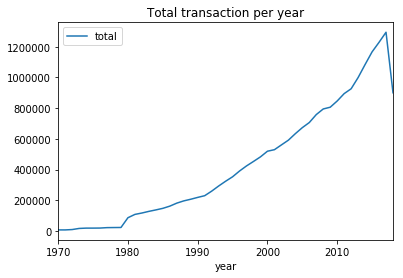

In [17]:
query2.toPandas().plot(x='year',y='total',title='Total transaction per year')

In [18]:
### Calculate total transaction for each day
query3=spark.sql("select `date`, count(`date`) as `total` \
            from stock \
            group by `date` \
            order by `date` desc")

In [19]:
query3.show()

+----------+-----+
|      date|total|
+----------+-----+
|2018-08-24| 5479|
|2018-08-23| 5441|
|2018-08-22| 5464|
|2018-08-21| 5471|
|2018-08-20| 5450|
|2018-08-17| 5444|
|2018-08-16| 5452|
|2018-08-15| 5459|
|2018-08-14| 5452|
|2018-08-13| 5481|
|2018-08-10| 5467|
|2018-08-09| 5450|
|2018-08-08| 5466|
|2018-08-07| 5458|
|2018-08-06| 5468|
|2018-08-03| 5462|
|2018-08-02| 5499|
|2018-08-01| 5499|
|2018-07-31| 5499|
|2018-07-30| 5498|
+----------+-----+
only showing top 20 rows

